# Used supervised learning to predicr whether the wine is good or not

In [13]:
# Machine Learning with pandas, seaborn, matplotlib, and scikit-learn
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
wine = pd.read_csv("winequality-red.csv", sep=";")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Prepocessing data

# bins = (number of groups, spread number of the quality, exact index of the quality)
bins = (2, 6.5, 8) # The quality column is all that matters, and the score starts from 1 to 8
group_names = ["Bad","Good"]
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)

In [6]:
wine['quality'].unique()

[Bad, Good]
Categories (2, object): [Bad < Good]

In [7]:
# Encode the group names into 0 and 1. 0 stands for bad quality wine, 1 stands for good quality wine.
label_quality = LabelEncoder()

In [8]:
# Fit the transformed data into the orginal column
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

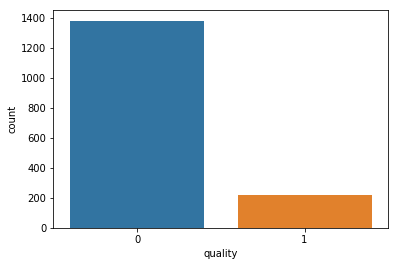

In [14]:
# Use seaborn to help visulizing the data
sns.countplot(wine['quality'])

In [42]:
# Now sepetate the dataset as response variable and feature variables
X = wine.drop('quality',axis=1)
y = wine['quality']
print(X.head())
print(type(y))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
<class '

In [25]:
# Set up the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [26]:
# Apply the standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classifiers

In [27]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [34]:
# Test how the model performs
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320



In [35]:
print(confusion_matrix(y_test,pred_rfc))

[[263  10]
 [ 21  26]]


In [36]:
# Support Vector Machines Classifier
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [44]:
# Test how the model performs
print(classification_report(y_test,pred_clf)) # Compare the true dataset and the predicted one

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [46]:
# Show the precision by using confusion matrix
print(confusion_matrix(y_test,pred_clf))

[[268   5]
 [ 35  12]]


In [49]:
# Neural Network 
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
"""hidden_layer_sizes:tuple, length = n_layers - 2, default (100,) 
The ith element represents the number of neurons in the ith hidden layer"""
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
# Test how the model works
print(classification_report(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       273
           1       0.55      0.57      0.56        47

   micro avg       0.87      0.87      0.87       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.87      0.87      0.87       320



In [51]:
# Show the precision by using confusion matrix
print(confusion_matrix(y_test,pred_mlpc))

[[251  22]
 [ 20  27]]
